In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("moa_session_update.csv")

In [3]:
df.head()

device session_date      time ap_id  level section  \
0  device:a4:eb:d3:6f:ab:03   10/17/2015  00:46:49  AP-1    1.0    Park   
1  device:b0:c5:59:9f:7b:e3   11/27/2015  00:23:09  AP-1    1.0    Park   
2  device:b0:c5:59:9f:7b:e3   11/27/2015  00:24:07  AP-1    1.0    Park   
3  device:f8:27:93:39:79:32   12/20/2015  00:57:04  AP-1    1.0    Park   
4  device:f8:27:93:39:79:32   12/20/2015  00:10:10  AP-1    1.0    Park   

   outside  entrance   X   Y  X_SECTION  Y_SECTION  
0      0.0       0.0 NaN NaN    14508.0    10163.7  
1      0.0       0.0 NaN NaN    14508.0    10163.7  
2      0.0       0.0 NaN NaN    14508.0    10163.7  
3      0.0       0.0 NaN NaN    14508.0    10163.7  
4      0.0       0.0 NaN NaN    14508.0    10163.7

In [4]:
df.shape

(772019, 12)

In [5]:
df.describe()

level        outside       entrance              X  \
count  764367.000000  762458.000000  762458.000000  755141.000000   
mean        1.756637       0.056677       0.109900   15060.646925   
std         1.091482       0.231225       0.312765    4111.786863   
min         0.000000       0.000000       0.000000    4301.000000   
25%         1.000000       0.000000       0.000000   11845.800000   
50%         2.000000       0.000000       0.000000   14793.700000   
75%         3.000000       0.000000       0.000000   18978.500000   
max         4.000000       1.000000       1.000000   24463.500000   

                   Y      X_SECTION      Y_SECTION  
count  755141.000000  762458.000000  762458.000000  
mean     9833.385838   15233.863022    9718.748726  
std      3283.846717    4075.502486    3267.634766  
min      4037.100000    8666.800000    5703.700000  
25%      6964.500000   14508.000000    6703.700000  
50%      9924.200000   14508.000000   10163.700000  
75%     12291.100000   19549.100000   10163.700000  
max     19418.200000   20349.100000   17526.000000

In [6]:
df.groupby(by='level', as_index=False).agg({'device': pd.Series.nunique})

level  device
0    0.0     613
1    0.1      13
2    1.0    4351
3    2.0    3903
4    3.0    4107
5    4.0    2050

In [7]:
df['level'].value_counts()

1.0    288125
3.0    194518
2.0    163407
0.0     82196
4.0     36054
0.1        67
Name: level, dtype: int64

In [6]:
df.groupby(by='outside', as_index=False).agg({'device': pd.Series.nunique})

outside  device
0      0.0    5209
1      1.0    2471

In [8]:
df['outside'].value_counts()

0.0    719244
1.0     43214
Name: outside, dtype: int64

In [10]:
df.groupby(by='section', as_index=False).agg({'device': pd.Series.nunique})

section  device
0       East    3553
1      North    2953
2  NorthEast    2777
3   NorthExt    1521
4  NorthWest    2720
5       Park    2473
6      South    3506
7  SouthEast    3030
8  SouthWest    2958
9       West    3007

In [18]:
df['section'].value_counts()

South        125765
East         116302
SouthEast    109181
Park          88173
North         76014
West          69541
SouthWest     63618
NorthEast     51465
NorthWest     41252
NorthExt      21147
Name: section, dtype: int64

In [12]:
df.groupby(by='entrance', as_index=False).agg({'device': pd.Series.nunique})

entrance  device
0       0.0    5095
1       1.0    4023

In [9]:
df['entrance'].value_counts()

0.0    678664
1.0     83794
Name: entrance, dtype: int64

In [12]:
df['ap_id'].value_counts()

MOA-AP-007    16752
MOA-AP-684    10878
MOA-AP-538     8723
MOA-AP-002     8334
MOA-AP-016     6319
MOA-AP-008     5903
MOA-AP-190     4820
MOA-AP-554     4230
MOA-AP-004     4113
MOA-AP-724     4110
MOA-AP-133     3815
MOA-AP-698     3808
MOA-AP-025     3757
MOA-AP-005     3544
MOA-AP-691     3544
MOA-AP-539     3492
MOA-AP-697     3480
MOA-AP-723     3407
MOA-AP-716     3387
MOA-AP-135     3297
MOA-AP-170     3225
MOA-AP-179     3153
MOA-AP-720     3137
MOA-AP-721     3109
MOA-AP-199     3094
MOA-AP-699     3077
MOA-AP-044     3017
MOA-AP-715     2990
AP-10          2972
MOA-AP-006     2960
              ...  
MOA-AP-655      128
MOA-AP-228      124
MOA-AP-223      122
MOA-AP-501      120
MOA-AP-524      119
MOA-AP-671      115
MOA-AP-216      110
MOA-AP-003      108
MOA-AP-674      105
MOA-AP-646       98
MOA-AP-032       98
MOA-AP-217       97
MOA-AP-436       89
MOA-AP-280       79
MOA-AP-654       77
MOA-AP-221       76
MOA-AP-192       71
MOA-AP-526       70
MOA-AP-652       68


In [10]:
df['outside'].value_counts()

0.0    719244
1.0     43214
Name: outside, dtype: int64

In [15]:
len(df.ap_id.unique())

657

In [16]:
len(df.device.unique())

5263

In [17]:
len(df.section.unique())

11

In [20]:
df['time'].dtype

dtype('O')

In [37]:
##splitting time variable
# Create two lists for the loop results to be placed
hour = []
minu = []
sec = []
# For each row in a varible,
for row in df['time']:
    hour.append(row.split(':')[0])
    minu.append(row.split(':')[1])
    sec.append(row.split(':')[2])   

# Create two new columns from lat and lon
df['hour'] = hour
df['min'] = minu

In [28]:
df.head()

device session_date      time ap_id  level section  \
0  device:a4:eb:d3:6f:ab:03   10/17/2015  00:46:49  AP-1    1.0    Park   
1  device:b0:c5:59:9f:7b:e3   11/27/2015  00:23:09  AP-1    1.0    Park   
2  device:b0:c5:59:9f:7b:e3   11/27/2015  00:24:07  AP-1    1.0    Park   
3  device:f8:27:93:39:79:32   12/20/2015  00:57:04  AP-1    1.0    Park   
4  device:f8:27:93:39:79:32   12/20/2015  00:10:10  AP-1    1.0    Park   

   outside  entrance   X   Y  X_SECTION  Y_SECTION hour min  
0      0.0       0.0 NaN NaN    14508.0    10163.7   00  46  
1      0.0       0.0 NaN NaN    14508.0    10163.7   00  23  
2      0.0       0.0 NaN NaN    14508.0    10163.7   00  24  
3      0.0       0.0 NaN NaN    14508.0    10163.7   00  57  
4      0.0       0.0 NaN NaN    14508.0    10163.7   00  10

In [ ]:
df['session_date']

In [33]:
df['time'].dtype

dtype('O')

In [12]:
# Create two lists for the loop results to be placed
month = []
date = []
year = []
# For each row in a varible,
for row in df['session_date']:
    month.append(row.split('/')[0])
    date.append(row.split('/')[1])
    year.append(row.split('/')[2])   

# Create 3 new columns 
df['month'] = month
df['date'] = date
df['year'] = year

In [13]:
df.head()

device session_date      time ap_id  level section  \
0  device:a4:eb:d3:6f:ab:03   10/17/2015  00:46:49  AP-1    1.0    Park   
1  device:b0:c5:59:9f:7b:e3   11/27/2015  00:23:09  AP-1    1.0    Park   
2  device:b0:c5:59:9f:7b:e3   11/27/2015  00:24:07  AP-1    1.0    Park   
3  device:f8:27:93:39:79:32   12/20/2015  00:57:04  AP-1    1.0    Park   
4  device:f8:27:93:39:79:32   12/20/2015  00:10:10  AP-1    1.0    Park   

   outside  entrance   X   Y  X_SECTION  Y_SECTION month date  year  
0      0.0       0.0 NaN NaN    14508.0    10163.7    10   17  2015  
1      0.0       0.0 NaN NaN    14508.0    10163.7    11   27  2015  
2      0.0       0.0 NaN NaN    14508.0    10163.7    11   27  2015  
3      0.0       0.0 NaN NaN    14508.0    10163.7    12   20  2015  
4      0.0       0.0 NaN NaN    14508.0    10163.7    12   20  2015

In [14]:
df['month'].value_counts()

12    155514
11    104583
3      93296
1      83481
2      75294
10     59488
06     34386
05     26162
02     25630
09     24028
01     21416
07     21019
08     16886
04     16187
03     14649
Name: month, dtype: int64

In [ ]:
df.drop('session_month', axis=1)

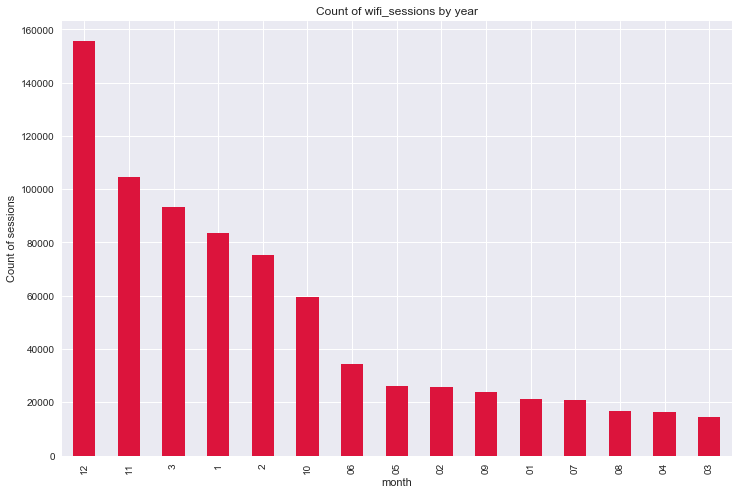

In [45]:
t1=df['month'].value_counts()
f, ax = plt.subplots(figsize=(15, 9))
t1.plot(kind = 'bar',figsize = (12,8),color = 'crimson')
plt.xlabel('month')
plt.ylabel('Count of sessions')
plt.title('Count of wifi_sessions by year')
plt.show()

In [46]:
df['year'].value_counts()

2016    416034
2015    355985
Name: year, dtype: int64

In [16]:
df['date'].value_counts()

01    68555
12    58226
03    50918
02    38371
26    35721
11    34670
27    33895
19    32236
13    32191
20    31887
28    31703
21    30488
29    29786
30    28846
23    26665
14    26033
16    25170
17    24963
15    23853
18    22756
22    22211
25    20206
24    19600
31    16950
04     6119
Name: date, dtype: int64

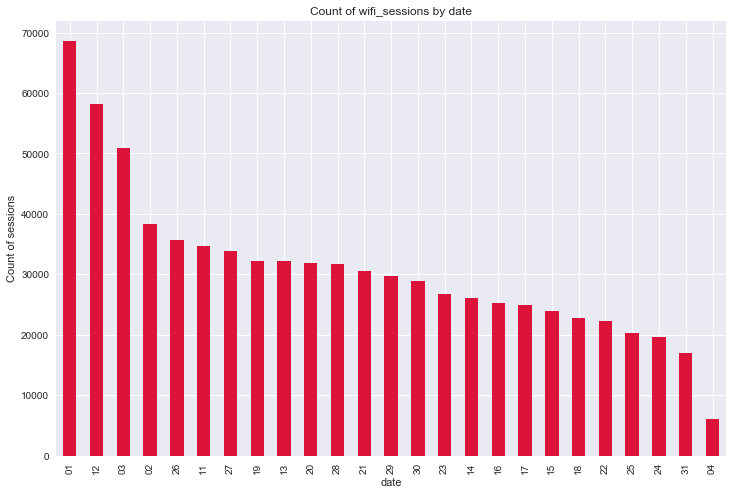

In [17]:
t1=df['date'].value_counts()
f, ax = plt.subplots(figsize=(15, 9))
t1.plot(kind = 'bar',figsize = (12,8),color = 'crimson')
plt.xlabel('date')
plt.ylabel('Count of sessions')
plt.title('Count of wifi_sessions by date')
plt.show()

In [58]:
# Create two lists for the loop results to be placed
id = []
# For each row in a varible,
for row in df['ap_id']:
    id.append(row.split('-')[1])

# Create 1 new column 
df['ap_id_n'] = id

In [18]:
df = pd.read_csv("moa_analytics.csv")

In [4]:
df.head()

device session_date  apple_flag        entry_time  \
0  device:00:ee:bd:c2:2a:2b   11-08-2015           0  08-11-2015 12:17   
1  device:00:ee:bd:c2:2c:93    3/26/2016           0  26-03-2016 14:13   
2  device:00:ee:bd:c2:2e:ba   11/21/2015           0  21-11-2015 14:17   
3  device:00:ee:bd:c2:37:17   11/21/2015           0  21-11-2015 20:35   
4  device:00:ee:bd:c2:37:17    3/21/2016           0  21-03-2016 17:49   

             exit_time  duration  avg_time_session_update  distinct_ap  \
0  08-11-2015 12:23:00     398.0                    199.0            1   
1  26-03-2016 18:57:00   17069.0                    107.0           75   
2  21-11-2015 17:06:00   10100.0                    124.0           33   
3  22-11-2015 00:22:00   13591.0                    109.0           29   
4  21-03-2016 17:57:00     490.0                    122.0            3   

   distinct_sessions  total_updates            ...             \
0                  1              3            ...              
1                 35            160            ...              
2                  7             82            ...              
3                 13            125            ...              
4                  2              5            ...              

   session_updates_3_S  session_updates_3_SE  session_updates_3_SW  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   session_updates_3_W  session_updates_4_E  session_updates_4_NE  \
0                    3                    0                     0   
1                    0                    0                     0   
2                    9                    0                     0   
3                    0                   80                    20   
4                    0                    0                     0   

   session_updates_4_S  session_updates_4_SE  session_updates_outside  \
0                    0                     0                        0   
1                    0                     0                        0   
2                    0                     0                        3   
3                    0                     2                        6   
4                    0                     0                        1   

   session_updates_entrance  
0                         3  
1                        16  
2                         8  
3                        30  
4                         4  

[5 rows x 108 columns]

In [5]:
###5255 are unique
df['device'].value_counts()

device:38:aa:3c:5d:80:c9    119
device:04:f1:3e:e2:ce:81    101
device:48:86:e8:7c:86:50     99
device:88:c9:d0:f3:7e:ab     97
device:54:4e:90:d4:ca:c9     96
device:64:76:ba:64:40:10     94
device:9c:a9:e4:d7:1a:da     86
device:d8:bb:2c:00:d7:8a     84
device:38:ca:da:54:b4:83     82
device:48:d7:05:b1:86:f5     81
device:94:e9:6a:b3:99:ca     80
device:38:ca:da:57:07:6a     75
device:10:a5:d0:d8:f8:51     59
device:1c:99:4c:6a:00:97     58
device:a0:39:f7:62:10:39     55
device:fc:db:b3:6a:0b:75     52
device:fc:db:b3:3f:bf:08     52
device:9c:a9:e4:aa:1b:55     50
device:98:f1:70:46:03:fa     47
device:c0:bd:d1:83:49:70     47
device:f4:0e:22:32:4b:94     47
device:70:ec:e4:6e:63:6c     47
device:2c:be:08:ac:0c:a4     45
device:ac:22:0b:5e:a3:a2     45
device:08:74:02:06:bc:66     43
device:84:78:8b:62:47:bc     43
device:84:7a:88:50:d6:f9     41
device:d4:f4:6f:3e:3e:b6     41
device:84:8e:df:72:05:55     41
device:a0:02:dc:f0:d6:c3     40
                           ... 
device:f

In [5]:
df.dtypes

device                        object
session_date                  object
apple_flag                     int64
entry_time                    object
exit_time                     object
duration                     float64
avg_time_session_update      float64
distinct_ap                    int64
distinct_sessions              int64
total_updates                  int64
time_per_distinct_ap         float64
distinct_sections_visited      int64
distinct_levels_visited        int64
weekend_flag                   int64
day_of_week                    int64
time_northfoodcourt            int64
time_southfoodcourt            int64
time_southrestaurant           int64
time_0_1                       int64
time_0                       float64
time_1                       float64
time_2                       float64
time_3                       float64
time_4                         int64
time_0_E                     float64
time_0_N                       int64
time_0_NE                      int64
t

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

device                       0
session_date                 0
apple_flag                   0
entry_time                   0
exit_time                    0
duration                     7
avg_time_session_update      7
distinct_ap                  0
distinct_sessions            0
total_updates                0
time_per_distinct_ap         7
distinct_sections_visited    0
distinct_levels_visited      0
weekend_flag                 0
day_of_week                  0
time_northfoodcourt          0
time_southfoodcourt          0
time_southrestaurant         0
time_0_1                     0
time_0                       2
time_1                       2
time_2                       2
time_3                       1
time_4                       0
time_0_E                     1
time_0_N                     0
time_0_NE                    0
time_0_S                     0
time_0_SE                    1
time_1_E                     1
                            ..
session_updates_1_NW         0
session_

In [19]:
df.dropna()

device session_date  apple_flag  \
0      device:00:ee:bd:c2:2a:2b    11/8/2015           0   
1      device:00:ee:bd:c2:2c:93    3/26/2016           0   
2      device:00:ee:bd:c2:2e:ba   11/21/2015           0   
3      device:00:ee:bd:c2:37:17   11/21/2015           0   
4      device:00:ee:bd:c2:37:17    3/21/2016           0   
5      device:00:ee:bd:c2:49:ef     1/2/2016           0   
6      device:00:ee:bd:c2:67:2a    12/6/2015           0   
7      device:00:ee:bd:c2:67:2a    2/13/2016           0   
8      device:00:ee:bd:c2:67:2a    2/20/2016           0   
9      device:00:f4:6f:6b:9d:eb    12/5/2015           0   
10     device:00:f4:6f:76:9e:78    1/25/2016           0   
11     device:00:f4:6f:9b:f2:a7    1/17/2016           0   
12     device:00:f4:6f:a2:ba:a5     1/9/2016           0   
13     device:04:48:9a:ea:6d:41   12/19/2015           1   
14     device:04:4b:ed:06:7f:e1     1/7/2016           1   
15     device:04:4b:ed:06:ee:68    11/1/2015           1   
16     device:04:4b:ed:06:ee:68   11/27/2015           1   
17     device:04:4b:ed:06:ee:68    1/30/2016           1   
18     device:18:1e:b0:0d:f9:b2    1/29/2016           0   
19     device:18:34:51:69:37:a6   10/17/2015           1   
20     device:18:34:51:6e:0c:30   12/18/2015           1   
21     device:18:34:51:75:4a:96   10/18/2015           1   
22     device:18:34:51:78:28:a1   11/27/2015           1   
23     device:18:34:51:7c:4b:0f   11/29/2015           1   
24     device:18:34:51:7c:4b:0f    12/6/2015           1   
25     device:18:34:51:7e:20:c9     1/9/2016           1   
26     device:18:34:51:7e:d4:cf    12/9/2015           1   
27     device:18:34:51:7e:d4:cf   12/26/2015           1   
28     device:18:34:51:7f:c5:86    11/6/2015           1   
29     device:18:34:51:7f:c5:86   11/13/2015           1   
...                         ...          ...         ...   
12591  device:a0:39:f7:62:10:39   10/31/2015           0   
12592  device:ac:22:0b:56:49:ff   11/19/2015           0   
12593  device:b0:c5:59:ae:33:5f   10/26/2015           0   
12594  device:b4:79:a7:12:76:82   11/27/2015           0   
12595  device:c0:bd:d1:82:eb:38     1/5/2016           0   
12596  device:c0:bd:d1:83:49:70    11/1/2015           0   
12597  device:c0:bd:d1:83:49:70   11/20/2015           0   
12598  device:cc:29:f5:7a:23:d4    3/19/2016           1   
12599  device:c8:85:50:82:ed:11    2/12/2016           1   
12600  device:c8:b5:b7:88:7e:b7     2/6/2016           1   
12601  device:d0:25:98:a7:a6:47    2/27/2016           1   
12602  device:d4:37:d7:11:dc:80   12/27/2015           0   
12603  device:d4:37:d7:26:e5:4c    12/2/2015           0   
12604  device:d4:f4:6f:3d:6d:12     2/2/2016           1   
12605  device:d8:d1:cb:b5:47:37   12/26/2015           1   
12606  device:dc:2b:2a:46:5b:3c     1/6/2016           1   
12607  device:dc:2b:2a:9d:0c:b9    3/25/2016           1   
12608  device:e4:90:7e:6b:56:b3    1/14/2016           0   
12609  device:e8:50:8b:4d:f3:4d    2/20/2016           0   
12610  device:e8:50:8b:53:e8:38    11/1/2015           0   
12611  device:ec:1f:72:60:17:e4     1/3/2016           0   
12612  device:ec:1f:72:6b:36:29     2/2/2016           0   
12613  device:ec:88:92:7e:38:05   10/17/2015           0   
12614  device:ec:9b:f3:47:87:d7    2/15/2016           0   
12615  device:f0:24:75:a8:86:ea    3/26/2016           1   
12616  device:f0:a2:25:08:8b:f7    11/4/2015           0   
12617  device:f4:09:d8:a7:38:52   12/20/2015           0   
12618  device:f4:09:d8:d8:5f:7b    3/26/2016           0   
12619  device:f4:0e:22:32:21:a6     1/5/2016           0   
12620  device:f8:27:93:39:02:ac     1/2/2016           1   

                   entry_time               exit_time  duration  \
0      2015-11-08 12:17:15.25  2015-11-08 12:23:53.57     398.0   
1      2016-03-26 14:13:24.45  2016-03-26 18:57:53.54   17069.0   
2      2015-11-21 14:17:56.76  2015-11-21 17:06:16.50   10100.0   
3      2015-11-21 20:35:30.40  2015-

In [20]:
median_value=df['avg_time_session_update'].median()
df['avg_time_session_update']=df['avg_time_session_update'].fillna(median_value)

In [21]:
median_value=df['time_per_distinct_ap'].median()
df['time_per_distinct_ap']=df['time_per_distinct_ap'].fillna(median_value)

In [22]:
median_value=df['duration'].median()
df['duration']=df['duration'].fillna(median_value)

In [23]:
df['duration'] = df['duration'].astype(int)

In [24]:
df['avg_time_session_update'] = df['avg_time_session_update'].astype(int)

In [25]:
df['time_per_distinct_ap']=df['time_per_distinct_ap'].astype(int)

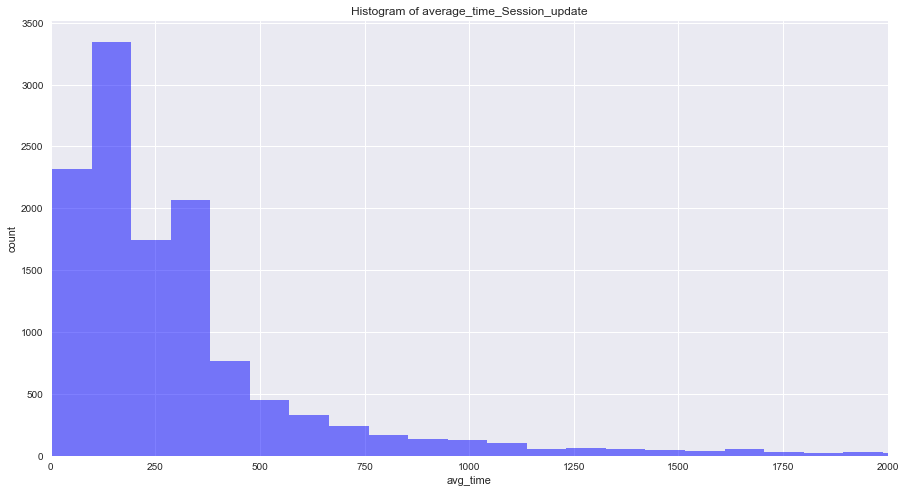

In [11]:
figure = plt.figure(figsize=(15,8))
plt.hist(df['avg_time_session_update'],bins = 200, alpha=0.5,color='blue')
plt.xlim([0, 2000])
plt.xlabel('avg_time')
plt.ylabel('count')
plt.title('Histogram of average_time_Session_update')

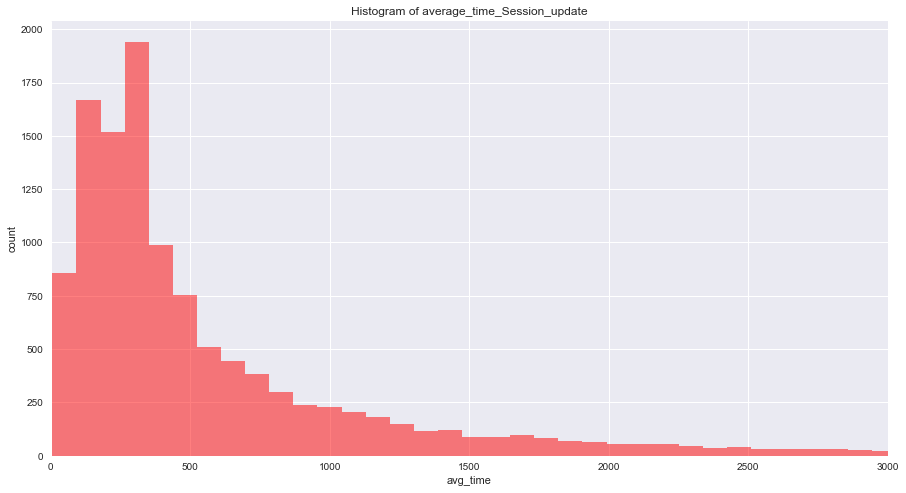

In [16]:
figure = plt.figure(figsize=(15,8))
plt.hist(df['time_per_distinct_ap'],bins = 1000, alpha=0.5,color='red')
plt.xlim([0, 3000])
plt.xlabel('avg_time')
plt.ylabel('count')
plt.title('Histogram of average_time_Session_update')

In [12]:
df['day_of_week'].value_counts()

7    3226
1    1958
6    1947
2    1585
5    1353
3    1282
4    1270
Name: day_of_week, dtype: int64

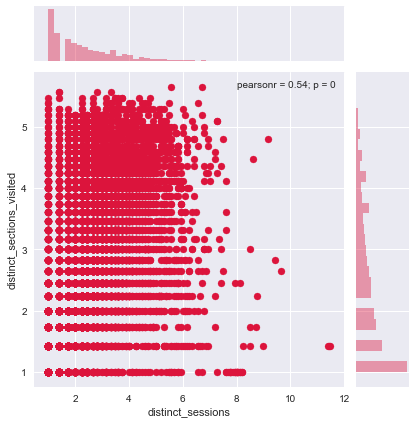

In [18]:
sns.jointplot(np.sqrt(df['distinct_sessions']),np.sqrt(df['distinct_sections_visited']),color='crimson')

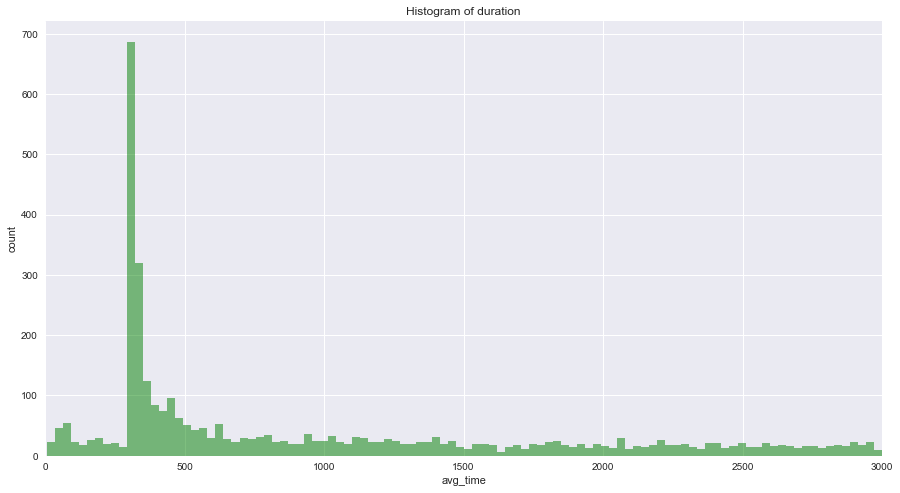

In [17]:
figure = plt.figure(figsize=(15,8))
plt.hist(df['duration'],bins = 3000 ,alpha=0.5,color='green')
plt.xlim([0, 3000])
plt.xlabel('avg_time')
plt.ylabel('count')
plt.title('Histogram of duration')

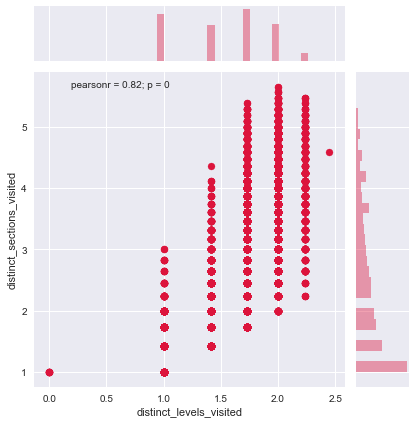

In [19]:
sns.jointplot(np.sqrt(df['distinct_levels_visited']),np.sqrt(df['distinct_sections_visited']),color='crimson')

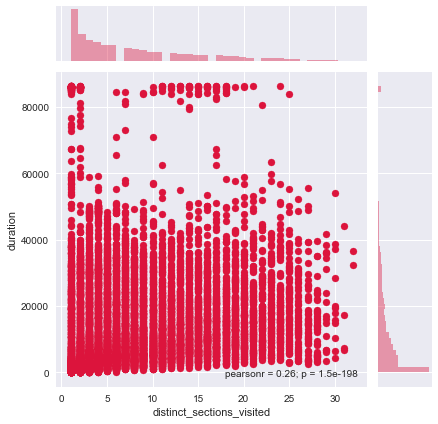

In [34]:
sns.jointplot(df['distinct_sections_visited'],df['duration'],color='crimson')

In [26]:
df.groupby('weekend_flag').mean()['duration']

weekend_flag
0    13053.793600
1    11267.202932
Name: duration, dtype: float64

In [28]:
df.groupby('day_of_week').mean()['duration'].sort_values(ascending =False)

day_of_week
3    14411.617785
4    14026.807087
2    13247.585489
5    12989.322247
7    11524.740236
6    11412.094504
1    10842.884576
Name: duration, dtype: float64

In [49]:
df.groupby('weekend_flag').mean()['distinct_levels_visited']

weekend_flag
0    2.516472
1    2.628086
Name: distinct_levels_visited, dtype: float64

In [50]:
df.groupby('weekend_flag').mean()['distinct_sections_visited']

weekend_flag
0    7.259110
1    8.201389
Name: distinct_sections_visited, dtype: float64

In [29]:
df.groupby('day_of_week').mean()['time_0'].sort_values(ascending =False)

day_of_week
4    4873.665354
3    4639.695550
5    4205.121212
2    3473.493375
6    2283.145865
1    1471.866633
7    1040.549287
Name: time_0, dtype: float64

In [30]:
df.groupby('day_of_week').mean()['time_1'].sort_values(ascending =False)

day_of_week
7    4492.792622
2    4423.832596
1    3979.665986
4    3935.747244
6    3907.986133
3    3902.476599
5    3653.556541
Name: time_1, dtype: float64

In [31]:
df.groupby('day_of_week').mean()['time_2'].sort_values(ascending =False)

day_of_week
7    2217.823311
3    2124.260734
5    2104.515152
2    2023.873186
6    2018.722650
1    1855.256515
4    1813.359055
Name: time_2, dtype: float64

In [47]:
c = df.groupby('day_of_week').mean()['time_3'].sort_values(ascending =False)

In [48]:
c

day_of_week
7    2895.297054
1    2749.414709
2    2678.437855
3    2644.163027
4    2569.951181
6    2503.144325
5    2261.847007
Name: time_3, dtype: float64

In [32]:
df.groupby('day_of_week').mean()['time_4'].sort_values(ascending =False)

day_of_week
7    799.271854
3    694.041342
1    643.505107
6    574.113508
5    562.878788
4    541.840157
2    400.415773
Name: time_4, dtype: float64

In [46]:
df.groupby('day_of_week').mean()['time_0_1'].sort_values(ascending =False)

day_of_week
2    49.694637
3    48.017161
5    41.936438
6    34.575244
7     4.135152
1     0.436670
4     0.435433
Name: time_0_1, dtype: float64

In [33]:
df.groupby('day_of_week').mean()['time_southfoodcourt'].sort_values(ascending =False)

day_of_week
7    289.471172
1    277.717058
4    274.682677
2    267.882650
3    230.414977
6    204.610169
5    189.055432
Name: time_southfoodcourt, dtype: float64

In [34]:
df.groupby('day_of_week').mean()['time_southrestaurant'].sort_values(ascending =False)

day_of_week
7    901.123063
1    828.070480
6    810.578326
3    776.314353
2    750.088959
4    668.403937
5    529.488544
Name: time_southrestaurant, dtype: float64

In [35]:
df.groupby('day_of_week').mean()['time_northfoodcourt'].sort_values(ascending =False)

day_of_week
2    252.306625
3    247.651326
5    235.520325
1    228.404494
7    214.452883
4    182.233858
6    143.880329
Name: time_northfoodcourt, dtype: float64

In [20]:
df_r = df.iloc[:,18:28]

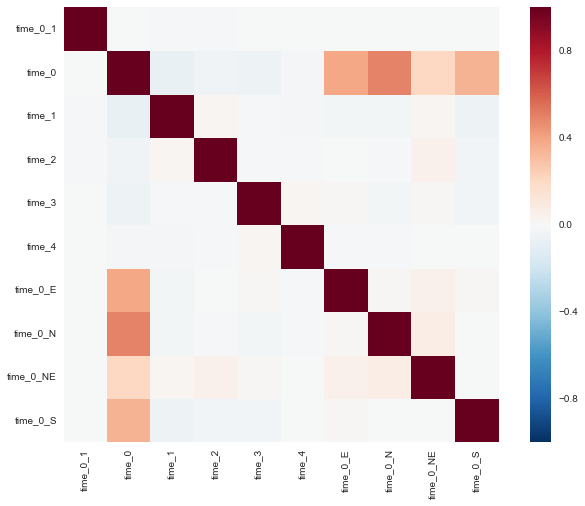

In [21]:
corr_r = df_r.corr()
fig,ax = plt.subplots(figsize = (11,8))
sns.heatmap(corr_r,square = True)

In [41]:
df1 = df.iloc[:,15:64]

In [36]:
df2 = df.iloc[:,65:108]

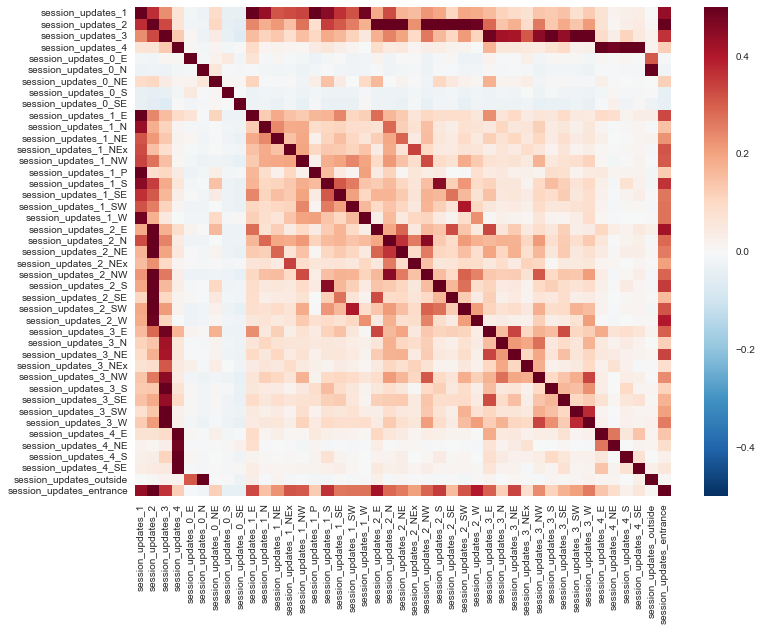

In [39]:
corr1 = df2.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr1,vmax = 0.5)

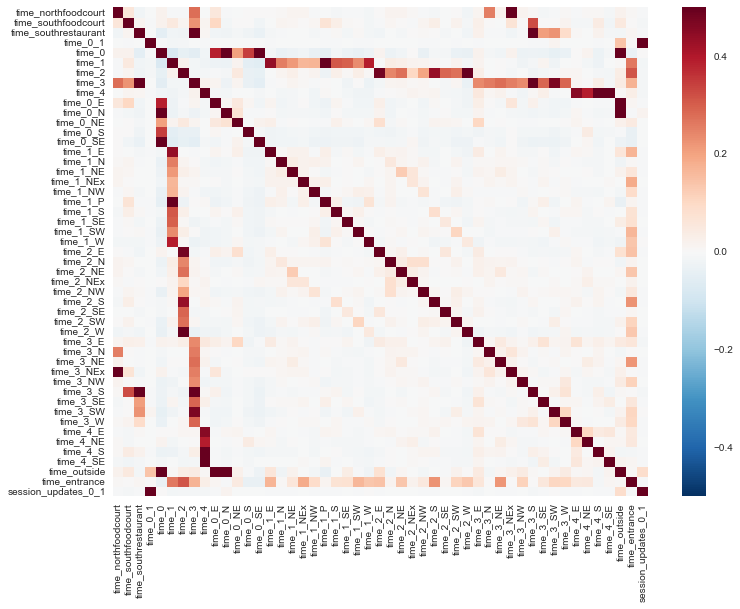

In [42]:
corr = df1.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corr,vmax = 0.5)